In [2]:
!conda env create -f py3_8.yml


NotWritableError: The current user does not have write permissions to a required path.
  path: /opt/conda/pkgs/cache/2ce54b42.json
  uid: 1002
  gid: 1003

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 1002:1003 /opt/conda/pkgs/cache/2ce54b42.json

In general, it's not advisable to use 'sudo conda'.




In [150]:
!ls /usr/local

bin  cuda  cuda-11.0  etc  games  include  lib	man  nccl2  sbin  share  src


In [3]:
pwd

'/home/jupyter/melusine'

In [5]:
!python -m ipykernel install --user --name=melusine-fork

Installed kernelspec melusine-fork in /home/jupyter/.local/share/jupyter/kernels/melusine-fork


In [ ]:
# choose kernel "melusine-fork"

In [3]:
!python setup.py develop

running develop
running egg_info
creating melusine.egg-info
writing melusine.egg-info/PKG-INFO
writing dependency_links to melusine.egg-info/dependency_links.txt
writing requirements to melusine.egg-info/requires.txt
writing top-level names to melusine.egg-info/top_level.txt
writing manifest file 'melusine.egg-info/SOURCES.txt'
package init file 'melusine/data/__init__.py' not found (or not a regular file)
reading manifest file 'melusine.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'melusine.egg-info/SOURCES.txt'
running build_ext
Creating /opt/conda/lib/python3.7/site-packages/melusine.egg-link (link to .)
Adding melusine 2.3.1 to easy-install.pth file

Installed /home/jupyter/melusine
Processing dependencies for melusine==2.3.1
Searching for numpy<1.19.0,>=1.16.4
Reading https://pypi.org/simple/numpy/
Best match: numpy 1.18.5
Processing numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl
Installing numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl to /opt

In [13]:
pip install numpy==1.20.1

  Using cached numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.18.0 requires tensorflow-io-gcs-filesystem==0.18.0, which is not installed.
streamlit 0.87.0 requires altair>=3.2.0, which is not installed.
streamlit 0.87.0 requires astor, which is not installed.
streamlit 0.87.0 requires base58, which is not installed.
streamlit 0.87.0 requires pydeck>=0.1.dev5, which is not installed.
streamlit 0.87.0 requires toml, which is not installed.
streamlit 0.87.0 requires tzlocal, which is not installed.
streamlit 0.87.0 requires validators, which is not installed.
streamlit 0.87.0 requires watchdog, which is not installed.
tfx-bsl 1.2.0 requires 

In [ ]:
# restart the kernel

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import ast
import pandas as pd
import numpy as np

df_emails_preprocessed = pd.read_csv('tutorial/data/emails_preprocessed.csv', encoding='utf-8', sep=';')
df_emails_preprocessed['clean_header'] = df_emails_preprocessed['clean_header'].astype(str)
df_emails_preprocessed['clean_body'] = df_emails_preprocessed['clean_body'].astype(str)
df_emails_preprocessed['attachment'] = df_emails_preprocessed['attachment'].apply(ast.literal_eval)

In [4]:
df_emails_preprocessed['clean_text'] = df_emails_preprocessed['clean_header'] + " " + df_emails_preprocessed['clean_body']

In [5]:
df_emails_preprocessed.clean_text[0]

'devis habitation je suis client chez vous pouvez vous m etablir un devis pour mon fils qui souhaite louer lappartement suivant : 25 rue du rueimaginaire  flag_cp_ '

In [6]:
df_meta = pd.read_csv('tutorial/data/metadata.csv', encoding='utf-8', sep=';')

In [7]:
X = pd.concat([df_emails_preprocessed['clean_text'],df_meta],axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
y = df_emails_preprocessed['label']
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from melusine.models.train import NeuralModel

In [10]:
len(np.unique(y))

11

In [11]:
from melusine.nlp_tools.embedding import Embedding

In [12]:
pretrained_embedding = Embedding().load('tutorial/data/embedding.pickle') 

# Deterministic model

In [23]:
from melusine.models.neural_architectures import bayesian_cnn_with_meta_model, cnn_model
deterministic_nn_model = NeuralModel(architecture_function=cnn_model,
                       pretrained_embedding=pretrained_embedding,
                       text_input_column="clean_text",
                       batch_size=20,
                       meta_input_list=['extension','attachment_type', 'dayofweek', 'hour', 'min'],
                       n_epochs=100)

In [24]:
%%time
deterministic_nn_model.fit(X,y,tensorboard_log_dir="tutorial/data")

Epoch 1/100
2/2 [==============================] - 2s 375ms/step - loss: 2.3847 - accuracy: 0.1750
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 2.2402 - accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 2.1073 - accuracy: 0.2750
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 2.0896 - accuracy: 0.2500
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 1.9319 - accuracy: 0.3500
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 1.9987 - accuracy: 0.2750
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 1.8672 - accuracy: 0.3000
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 1.8373 - accuracy: 0.3500
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 1.7546 - accuracy: 0.3500
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 1.7139 - accuracy: 0.3750
Epoch 11/100
2/2 [

### The deterministic model is able to give us point estimation of probabilities. But we can do better...

In [15]:
deterministic_nn_model.predict_proba(X)[:2]

array([[0.09265286, 0.08264095, 0.08558009, 0.09320477, 0.09810311,
        0.08850773, 0.08135963, 0.10231458, 0.08211583, 0.07948947,
        0.11403093],
       [0.09605372, 0.08046731, 0.08194782, 0.09491058, 0.09741408,
        0.07861298, 0.0797333 , 0.11016141, 0.07814865, 0.0747059 ,
        0.12784429]], dtype=float32)

# The probabilitic model 
The probabilitic gives us not longer point estimation but distribution on predictions. It allows us to give confidence intervals.

In [21]:
from melusine.models.neural_architectures import bayesian_cnn_with_meta_model
nn_model = NeuralModel(architecture_function=bayesian_cnn_with_meta_model,
                       pretrained_embedding=pretrained_embedding,
                       text_input_column="clean_text",
                       batch_size=20,
                       meta_input_list=['extension','attachment_type', 'dayofweek', 'hour', 'min'],
                       n_epochs=100)

In [22]:
%%time
nn_model.fit(X,y,tensorboard_log_dir="tutorial/data")

Epoch 1/100
2/2 [==============================] - 2s 404ms/step - loss: 2.3704 - accuracy: 0.0250
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 2.2303 - accuracy: 0.1500
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 2.0798 - accuracy: 0.2250
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 2.1171 - accuracy: 0.3250
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 1.9434 - accuracy: 0.2750
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 1.8456 - accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 1.7567 - accuracy: 0.3750
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 1.7152 - accuracy: 0.4000
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 1.6950 - accuracy: 0.4250
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 1.6333 - accuracy: 0.4750
Epoch 11/100
2/2 [

### The estimation of the probability is now the mean of the distribution of the prediction

In [25]:
better_estimation = nn_model.predict_proba(X)

### More important we now can have confidence intervals

In [26]:
score, inf, sup = nn_model.predict_proba(X, confidence_interval=0.95)

In [27]:
import matplotlib.pyplot as plt
ntargets = 11


def analyse_and_plot_model_predictions(data, true_labels, nn_model, text_num, ci=0.95):
    """
    Make plots of the probabilities that the model estimates for a given text
    """
    true_label = true_labels[text_num]
    true_label_decoded = le.inverse_transform([true_label])[0]
    print('True label: \033[1m \033[92m {} \033[0m'.format(str(true_label_decoded)))
    print('Clean text: ', data.loc[text_num, "clean_text"])
    model_prediction, pct_low, pct_up = nn_model.predict_proba(data.loc[text_num:text_num], confidence_interval=ci)
    model_prediction, pct_low, pct_up = model_prediction[0], pct_low[0], pct_up[0]
    x_pos = np.arange(ntargets)
    bar = plt.bar(x_pos, pct_up, color='red')
    all_categories_decoded = le.inverse_transform(np.arange(ntargets))
    plt.xticks(x_pos, all_categories_decoded, color='black', rotation=45, fontweight='bold', fontsize='10', horizontalalignment='right')
    ax = plt.gca()
    labels = ax.get_xticklabels()
    ticks = ax.get_xticks()
    for label, tick in zip(labels, ticks):
        if tick == true_label:
            label.set_color('green')
    bar[true_label].set_color('green')
    plt.bar(np.arange(ntargets), pct_low-0.02, color='white', linewidth=1, edgecolor='white')
    plt.ylim([0, 1])
    plt.ylabel('Probability')
    plt.title('Model estimated probabilities') 
    plt.show()

True label:   vehicule 
Clean text:  immatriculation voiture je vous informe que la nouvelle immatriculation est enfin faite. je vous prie de trouver donc la carte grise ainsi que la nouvelle immatriculation. je vous demanderai de faire les changements necessaires concernant lassurance.


/home/jupyter/melusine/melusine/nlp_tools/tokenizer.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["tokens"] = apply_func(X, self.tokenize)
/home/jupyter/melusine/melusine/nlp_tools/tokenizer.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["tokens"] = apply_func(X, lambda x: x["tokens"][0])


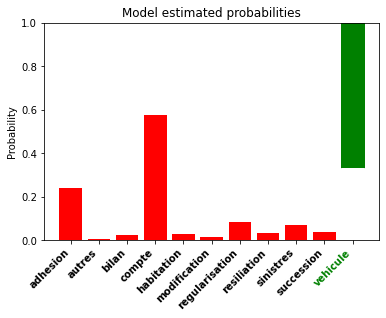

In [28]:
i = 1
analyse_and_plot_model_predictions(X, y, nn_model, text_num=i, ci=0.95)

In [1]:
!pip freeze | grep tensorflow

tensorflow @ file:///opt/conda/conda-bld/dlenv-tf-2-5-gpu_1627618644005/work/tensorflow-2.5.0-cp37-cp37m-linux_x86_64.whl
tensorflow-cloud==0.1.14
tensorflow-datasets==4.3.0
tensorflow-estimator==2.5.0
tensorflow-hub==0.12.0
tensorflow-io==0.18.0
tensorflow-metadata==1.2.0
tensorflow-probability==0.13.0rc0
tensorflow-serving-api==2.5.1
tensorflow-transform==1.2.0


# To go further : the bayesian neural network

In [31]:
from melusine.models.neural_architectures import variational_cnn_model
variational_nn_model = NeuralModel(architecture_function=variational_cnn_model,
                       pretrained_embedding=pretrained_embedding,
                       text_input_column="clean_text",
                       batch_size=20,
                       meta_input_list=[],
                       n_epochs=100)

In [32]:
%%time
variational_nn_model.fit(X,y,tensorboard_log_dir="tutorial/data")

Epoch 1/100
2/2 [==============================] - 3s 391ms/step - loss: 7385.3374 - accuracy: 0.1750
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 7382.9780 - accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7372.1611 - accuracy: 0.2250
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7366.8970 - accuracy: 0.1000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7362.6235 - accuracy: 0.0250
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 7355.2607 - accuracy: 0.1750
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 7349.4385 - accuracy: 0.1500
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7344.0205 - accuracy: 0.0750
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 7338.8828 - accuracy: 0.1500
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7329.8813 - accuracy: 0.12

True label:   vehicule 
pret vehicule ci-joint pret vehicule


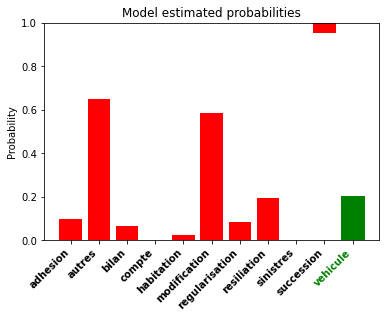

In [58]:
i = 9
analyse_and_plot_model_predictions(X, y, variational_nn_model, i)

In [33]:
from melusine.models.neural_architectures import flipout_cnn_model
flipout_nn_model = NeuralModel(architecture_function=flipout_cnn_model,
                       pretrained_embedding=pretrained_embedding,
                       text_input_column="clean_text",
                       batch_size=20,
                       meta_input_list=[],
                       n_epochs=100)

In [34]:
%%time
flipout_nn_model.fit(X,y,tensorboard_log_dir="tutorial/data")

Epoch 1/100
2/2 [==============================] - 2s 408ms/step - loss: 7850.7695 - accuracy: 0.0500
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 7844.2422 - accuracy: 0.0750
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 7837.7280 - accuracy: 0.1500
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 7831.2280 - accuracy: 0.1250
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 7824.7412 - accuracy: 0.1000
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 7818.2671 - accuracy: 0.2500
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 7811.8062 - accuracy: 0.2000
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7805.3594 - accuracy: 0.2250
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 7798.9243 - accuracy: 0.1750
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 7792.5015 - accuracy: 0.2

True label:   vehicule 
pret vehicule ci-joint pret vehicule


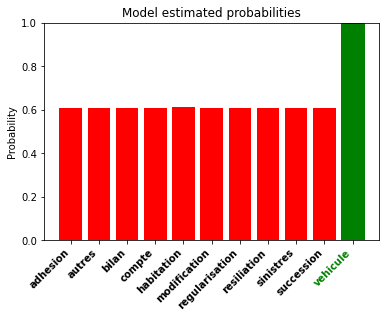

In [65]:
i = 9
analyse_and_plot_model_predictions(X, y, flipout_nn_model, i)

## TODO Usecase : what if the labels are incorrects ?

In [50]:
## si j'inverse des labels (cause de rush, organisation d'équipes). On augmente l'erreur résiduelle due à la qualité des données. 
## On peut revenir vers le client avec un diagnostique.
## Repérer en particulier les mails qui ont une incertitude forte et les repasser en labellisation.
## mettre l'accent dessus.

## Usecase : What if a mail has several categories ?

Let's concatenate 2 mails of differents categories

In [35]:
i=4
true_label_decoded = le.inverse_transform([y[i]])[0]
print('True label: \033[1m \033[92m {} \033[0m'.format(str(true_label_decoded)))
print(X.loc[i,"clean_text"])

True label:   adhesion 
bulletin de salaire voici ci joint mon bulletin de salaire comme demande.


In [36]:
i=5
true_label_decoded = le.inverse_transform([y[i]])[0]
print('True label: \033[1m \033[92m {} \033[0m'.format(str(true_label_decoded)))
print(X.loc[i,"clean_text"])

True label:   habitation 
modification et extension de ma maison je vous avais contactes car j'avais pour projet d'agrandir ma maison. j'avais recu un devis pour lequel je n'avais pas donne suite, les travaux n'etant pas encore realises. le projet a maintenant ete porte a son terme et je voudrais donc revoir votre offre si possible. je desire garder le meme type de contrat.


In [37]:
def fusion_rows(df, indice_1, indice_2):
    row_1 = df.loc[indice_1]
    row_2 = df.loc[indice_2]
    dict_agg = {}

    for colname in df.columns:
        if colname.startswith(('attachment_type', 'extension__', 'tokens')):
            # sum of the values (attachments, extension) and concat the lists of tokens
            agg_value = np.sum([row_1[colname], row_2[colname]])
        elif colname == "clean_text":
            # we concatenate with a dot as a separator
            agg_value = ". ".join([row_1[colname], row_2[colname]])
        else:
            # we retain the value of the first email
            agg_value = row_2[colname]
        dict_agg[colname] = agg_value
    row_agg = pd.Series(dict_agg)
    df_agg = pd.DataFrame([row_agg])
    return df_agg
merged = fusion_rows(X, 4, 5)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [38]:
merged["clean_text"].loc[0]

"bulletin de salaire voici ci joint mon bulletin de salaire comme demande.. modification et extension de ma maison je vous avais contactes car j'avais pour projet d'agrandir ma maison. j'avais recu un devis pour lequel je n'avais pas donne suite, les travaux n'etant pas encore realises. le projet a maintenant ete porte a son terme et je voudrais donc revoir votre offre si possible. je desire garder le meme type de contrat."

True label:   adhesion 
Clean text:  bulletin de salaire voici ci joint mon bulletin de salaire comme demande.. modification et extension de ma maison je vous avais contactes car j'avais pour projet d'agrandir ma maison. j'avais recu un devis pour lequel je n'avais pas donne suite, les travaux n'etant pas encore realises. le projet a maintenant ete porte a son terme et je voudrais donc revoir votre offre si possible. je desire garder le meme type de contrat.


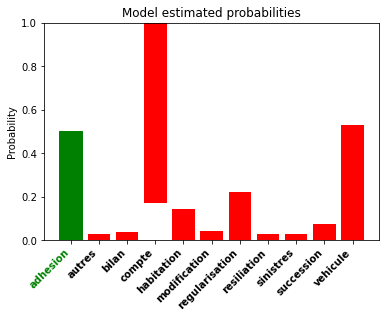

In [40]:
analyse_and_plot_model_predictions(merged, [y[4]], nn_model, 0)

True label:   adhesion 
Clean text:  bulletin de salaire voici ci joint mon bulletin de salaire comme demande.. modification et extension de ma maison je vous avais contactes car j'avais pour projet d'agrandir ma maison. j'avais recu un devis pour lequel je n'avais pas donne suite, les travaux n'etant pas encore realises. le projet a maintenant ete porte a son terme et je voudrais donc revoir votre offre si possible. je desire garder le meme type de contrat.


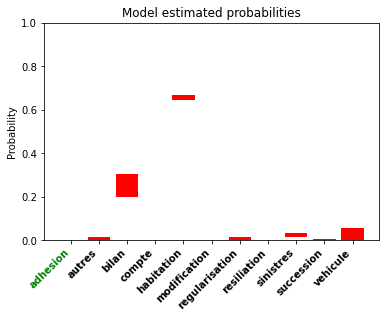

In [42]:
analyse_and_plot_model_predictions(merged, [y[4]], variational_nn_model, 0)

True label:   adhesion 
Clean text:  bulletin de salaire voici ci joint mon bulletin de salaire comme demande.. modification et extension de ma maison je vous avais contactes car j'avais pour projet d'agrandir ma maison. j'avais recu un devis pour lequel je n'avais pas donne suite, les travaux n'etant pas encore realises. le projet a maintenant ete porte a son terme et je voudrais donc revoir votre offre si possible. je desire garder le meme type de contrat.


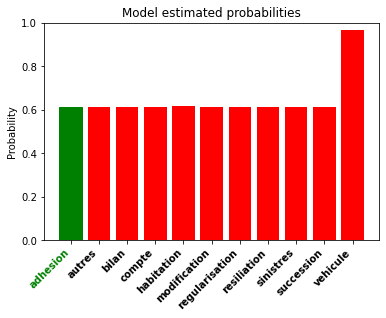

In [44]:
analyse_and_plot_model_predictions(merged, [y[4]], flipout_nn_model, 0)

# Train a model on corrupted data to see it we can find out after the examples corrupted.
# Or find that we could do multi-label classif.

In [47]:
df_emails_preprocessed['label'].value_counts()

vehicule          13
habitation         8
resiliation        6
compte             3
adhesion           3
modification       2
autres             1
bilan              1
succession         1
regularisation     1
sinistres          1
Name: label, dtype: int64

In [79]:
import random
def random_transfer(categories, category_to_transfer):
    other_categories = [c for c in categories if c != category_to_transfer]
    return random.choice(other_categories)
code_vehicule = le.transform(["vehicule"])[0]
random_transfer(y, code_vehicule)

6

In [16]:
from melusine.prepare_email.metadata_engineering import MetaDate
meta = MetaDate()
df_date = meta.transform(df_emails_preprocessed)
df_date.date

0    2018-05-24 11:36:00
1    2018-05-24 19:37:00
2    2018-05-25 06:45:00
3    2018-05-25 10:15:00
4    2018-05-25 17:30:00
5    2018-05-31 10:28:00
6    2018-05-30 15:56:00
7    2018-05-31 14:02:00
8    2018-05-31 17:10:00
9    2018-05-31 08:54:00
10   2018-05-30 10:12:00
11   2018-05-31 12:44:00
12   2018-06-04 09:56:00
13   2018-06-04 14:09:00
14   2018-01-06 16:03:00
15   2018-06-04 10:22:00
16   2018-06-04 15:39:00
17   2018-06-04 15:49:00
18   2018-06-04 18:04:00
19   2018-06-04 20:45:00
20   2018-06-04 22:28:00
21   2018-02-06 11:07:00
22   2018-03-06 16:52:00
23   2018-06-04 11:19:00
24   2018-06-04 10:58:00
25   2018-06-04 15:37:00
26   2018-06-05 09:04:00
27   2018-06-05 10:56:00
28   2018-06-05 11:12:00
29   2018-06-05 17:37:00
30   2018-06-05 10:06:00
31   2018-06-05 12:33:00
32   2018-06-05 14:11:00
33   2018-06-05 16:06:00
34   2018-06-07 12:38:00
35   2018-06-07 18:22:00
36   2018-06-07 15:16:00
37   2018-06-07 10:45:00
38   2018-06-07 11:40:00
39   2018-06-07 16:32:00


In [29]:
import copy
def swap_period(df, origin, destination, start_date, end_date, rate):
    """here we are simulating a period of swap between two services 
    (because of a rush period for instance)
    between the 15 of august and the 1st of september, 
    half of the emails for vehicles are transfered randomly to the other services"""
    
    swapped_df = copy.deepcopy(df)
    is_habitation = swapped_df.eval('label == @origin and date > @start_date and date < @end_date')
    idx_habitation = is_habitation.index[is_habitation]

    n_habitation = len(idx_habitation)
    num_to_transfer = int(rate*n_habitation)
    idx_to_transfer = np.random.choice(idx_habitation, replace=False, size=num_to_transfer)
    swapped_df.loc[:,"swapped_label"] = swapped_df.loc[:,"label"]
    swapped_df.loc[idx_to_transfer,"swapped_label"] = destination
    #import pdb;pdb.set_trace()
    return swapped_df

In [30]:
swapped_df = swap_period(df_date, "habitation", "adhesion", "2017-06-05 00:00:00", "2018-06-07 00:00:00", 0.3)

In [34]:
df_emails_preprocessed.label.value_counts()

vehicule          13
habitation         8
resiliation        6
compte             3
adhesion           3
modification       2
autres             1
bilan              1
succession         1
regularisation     1
sinistres          1
Name: label, dtype: int64

In [35]:
pd.crosstab(swapped_df["label"], swapped_df["swapped_label"])

swapped_label,adhesion,autres,bilan,compte,habitation,modification,regularisation,resiliation,sinistres,succession,vehicule
label,,,,,,,,,,,
adhesion,3,0,0,0,0,0,0,0,0,0,0
autres,0,1,0,0,0,0,0,0,0,0,0
bilan,0,0,1,0,0,0,0,0,0,0,0
compte,0,0,0,3,0,0,0,0,0,0,0
habitation,1,0,0,0,7,0,0,0,0,0,0
modification,0,0,0,0,0,2,0,0,0,0,0
regularisation,0,0,0,0,0,0,1,0,0,0,0
resiliation,0,0,0,0,0,0,0,6,0,0,0
sinistres,0,0,0,0,0,0,0,0,1,0,0


## Let's train a model on this swapped data

In [37]:
X = pd.concat([swapped_df['clean_text'],df_meta],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = df_emails_preprocessed['label']
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
from melusine.models.neural_architectures import bayesian_cnn_with_meta_model
nn_model = NeuralModel(architecture_function=bayesian_cnn_with_meta_model,
                       pretrained_embedding=pretrained_embedding,
                       text_input_column="clean_text",
                       batch_size=20,
                       meta_input_list=['extension','attachment_type', 'dayofweek', 'hour', 'min'],
                       n_epochs=100)

In [40]:
nn_model.fit(X,y,tensorboard_log_dir="tutorial/data")

Epoch 1/100
2/2 [==============================] - 3s 433ms/step - loss: 2.4141 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 2.2591 - accuracy: 0.2750
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 2.0390 - accuracy: 0.3250
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 2.0689 - accuracy: 0.2500
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 2.0115 - accuracy: 0.3500
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 1.9891 - accuracy: 0.3250
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 1.9330 - accuracy: 0.2250
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 1.8742 - accuracy: 0.3000
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 1.7708 - accuracy: 0.4000
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 1.6399 - accuracy: 0.4250
Epoch 11/100
2

In [ ]:
epistemic : sur des data qui ont peu été vues.
aleatoric : l'erreur du à la labellisation

In [74]:
y

array([ 4, 10,  3,  0,  0,  4,  7, 10,  1, 10,  2,  5, 10, 10,  4,  7,  7,
       10,  0,  9,  4, 10,  4,  7, 10, 10,  6,  7,  3,  8, 10, 10, 10,  4,
        7,  3,  5,  4,  4, 10])

In [86]:
from tensorflow_probability import distributions as tfd
features = tfd.Normal(loc=0., scale=1.).sample(int(5))
bernoulli = tfd.Bernoulli(logits=1.618 * features)

In [87]:
bernoulli.mean()

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.8882861 , 0.9331638 , 0.95070904, 0.15552284, 0.2400191 ],
      dtype=float32)>

In [93]:
bernoulli.cdf(0.1)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.11171389, 0.06683618, 0.04929096, 0.8444772 , 0.7599809 ],
      dtype=float32)>

In [92]:
bernoulli.cdf(0.95)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.11171389, 0.06683618, 0.04929096, 0.8444772 , 0.7599809 ],
      dtype=float32)>

In [91]:
bernoulli.cdf(0.5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.11171389, 0.06683618, 0.04929096, 0.8444772 , 0.7599809 ],
      dtype=float32)>

In [94]:
bernoulli.prob(0.05)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.1239166 , 0.07625338, 0.05715193, 0.77597594, 0.71742225],
      dtype=float32)>

In [100]:
bernoulli.cdf?

Signature: bernoulli.cdf(value, name='cdf', **kwargs)
Docstring:
Cumulative distribution function.

Given random variable `X`, the cumulative distribution function `cdf` is:

```none
cdf(x) := P[X <= x]
```

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  cdf: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


In [99]:
bernoulli.quantile?

Signature: bernoulli.quantile(value, name='quantile', **kwargs)
Docstring:
Quantile function. Aka 'inverse cdf' or 'percent point function'.

Given random variable `X` and `p in [0, 1]`, the `quantile` is:

```none
quantile(p) := x such that P[X <= x] == p
```

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  quantile: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


In [80]:
bernoulli.prob?

Signature: bernoulli.prob(value, name='prob', **kwargs)
Docstring:
Probability density/mass function.

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  prob: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


In [78]:
bernoulli.prob(0.95)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14039457, 0.19465165, 0.25647277, 0.3696385 , 0.36143744],
      dtype=float32)>

In [68]:
features = tfd.Normal(loc=0., scale=1.).sample(int(5))
bernoulli = tfd.Bernoulli(logits=1.618 * features)
print("bernoulli.cdf(0.95)", bernoulli.cdf(0.95))
bernoulli.cdf?

bernoulli.cdf(0.95) tf.Tensor([0.87247586 0.81953216 0.7577414  0.6409152  0.6495433 ], shape=(5,), dtype=float32)


Signature: bernoulli.cdf(value, name='cdf', **kwargs)
Docstring:
Cumulative distribution function.

Given random variable `X`, the cumulative distribution function `cdf` is:

```none
cdf(x) := P[X <= x]
```

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  cdf: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.43110496, 0.5567271 , 0.88557   , 0.05961686, 0.96272886,
       0.3849101 , 0.84136146, 0.03067887, 0.8896462 , 0.20625603,
       0.24786615, 0.60711765, 0.3435384 , 0.28218108, 0.10468102,
       0.8444642 , 0.01992315, 0.22752297, 0.77935624, 0.24141413,
       0.8758018 , 0.723384  , 0.23492748, 0.36119676, 0.7137803 ,
       0.07756138, 0.5637373 , 0.7721677 , 0.88487196, 0.39660627,
       0.5715605 , 0.7153101 , 0.70246327, 0.8458277 , 0.5728475 ,
       0.5862157 , 0.65055484, 0.9102088 , 0.33827293, 0.08946258,
       0.26819146, 0.09365308, 0.08825713, 0.9648313 , 0.58598834,
       0.74852586, 0.04141301, 0.3953362 , 0.6056563 , 0.9789175 ,
       0.49299073, 0.34908152, 0.15568525, 0.16918254, 0.46534127,
       0.07172453, 0.40860653, 0.26030278, 0.35145527, 0.5460242 ,
       0.4769727 , 0.5961213 , 0.39661366, 0.61699116, 0.6963072 ,
       0.5307225 , 0.03820926, 0.71333754, 0.46681446, 0.23030603,
       0.26619

In [ ]:
tfd.Bernoulli(logits=1.618 * features).cdf

In [ ]:
tfd.Bernoulli(logits=1.618 * features).cdf

In [53]:
labels.cdf?

Signature: labels.cdf(value, name='cdf', **kwargs)
Docstring:
Cumulative distribution function.

Given random variable `X`, the cumulative distribution function `cdf` is:

```none
cdf(x) := P[X <= x]
```

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  cdf: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


In [42]:
labels.__dir__()

['_parameters',
 '_probs',
 '_logits',
 '_name',
 '_name_scope',
 '_dtype',
 '_reparameterization_type',
 '_allow_nan_stats',
 '_validate_args',
 '_parameters_sanitized',
 '_self_setattr_tracking',
 '_self_unconditional_checkpoint_dependencies',
 '_self_unconditional_dependency_names',
 '_self_unconditional_deferred_dependencies',
 '_self_update_uid',
 '_self_name_based_restores',
 '_self_saveable_object_factories',
 '_graph_parents',
 '_defer_all_assertions',
 '_initial_parameter_control_dependencies',
 '_Distribution__cached_batch_shape',
 '__module__',
 '__doc__',
 '__init__',
 '_parameter_properties',
 'logits',
 'probs',
 '_event_shape_tensor',
 '_event_shape',
 '_sample_n',
 '_log_prob',
 '_outcome_log_probs',
 '_cdf',
 '_entropy',
 '_mean',
 '_variance',
 '_mode',
 'logits_parameter',
 '_logits_parameter_no_checks',
 'probs_parameter',
 '_probs_parameter_no_checks',
 '_default_event_space_bijector',
 '_parameter_control_dependencies',
 '_sample_control_dependencies',
 'cross_ent

In [105]:
X_input = nn_model.prepare_email_to_predict(X)
nn_model.model(X_input)

<tfp.distributions.OneHotCategorical 'model_one_hot_categorical_OneHotCategorical_OneHotCategorical' batch_shape=[40] event_shape=[11] dtype=float32>

In [108]:
nn_model.model(X_input).prob(0.5)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([4.52391596e-12, 1.81985340e-13, 1.07441206e-15, 9.66536712e-11,
       2.03147943e-09, 6.21834528e-10, 3.88106214e-09, 2.56384269e-19,
       2.84721313e-08, 2.50929665e-14, 2.54012904e-11, 5.91992318e-07,
       3.27808744e-29, 7.57826148e-15, 3.34826680e-11, 2.24422947e-09,
       1.22682486e-08, 2.38922898e-17, 2.11296604e-15, 6.83143776e-12,
       8.53359883e-10, 1.00269220e-24, 2.46352526e-13, 2.92819796e-10,
       4.23993590e-14, 1.47480293e-20, 3.42559581e-08, 2.31843540e-08,
       7.61404777e-15, 5.46089666e-07, 4.07053762e-21, 1.02651084e-14,
       1.00367065e-19, 1.88005629e-08, 3.99538962e-08, 1.73913348e-22,
       2.86172259e-08, 4.49943238e-09, 8.31410808e-12, 4.58630572e-23],
      dtype=float32)>

In [109]:
nn_model.model(X_input).prob(0.95)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([2.78918522e-22, 6.22402873e-25, 3.62430675e-29, 9.37377937e-20,
       3.05381947e-17, 3.22094949e-18, 1.04473335e-16, 4.75219169e-36,
       4.60678689e-15, 1.44261459e-26, 7.39989314e-21, 1.47028147e-12,
       0.00000000e+00, 1.48314189e-27, 1.25071348e-20, 3.69000838e-17,
       9.30436364e-16, 2.62235363e-32, 1.31008134e-28, 6.10342212e-22,
       5.87696440e-18, 0.00000000e+00, 1.10651409e-24, 7.70090520e-19,
       3.90826098e-26, 2.09213623e-38, 6.54634072e-15, 3.11795242e-15,
       1.49646885e-27, 1.26125434e-12, 0.00000000e+00, 2.63991455e-27,
       7.99880804e-37, 2.09374940e-15, 8.76926688e-15, 0.00000000e+00,
       4.65149879e-15, 1.38356638e-16, 8.86441762e-22, 0.00000000e+00],
      dtype=float32)>

In [121]:
onehotcat = nn_model.model(X_input)
onehotcat.cdf?

Signature: onehotcat.cdf(value, name='cdf', **kwargs)
Docstring:
Cumulative distribution function.

Given random variable `X`, the cumulative distribution function `cdf` is:

```none
cdf(x) := P[X <= x]
```

Args:
  value: `float` or `double` `Tensor`.
  name: Python `str` prepended to names of ops created by this function.
  **kwargs: Named arguments forwarded to subclass implementation.

Returns:
  cdf: a `Tensor` of shape `sample_shape(x) + self.batch_shape` with
    values of type `self.dtype`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py
Type:      method


In [ ]:
onehotcat = nn_model.model(X_input).prob

In [119]:
nn_model.model(X_input).prob(0.5)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([4.52391596e-12, 1.81985340e-13, 1.07441206e-15, 9.66536712e-11,
       2.03147943e-09, 6.21834528e-10, 3.88106214e-09, 2.56384269e-19,
       2.84721313e-08, 2.50929665e-14, 2.54012904e-11, 5.91992318e-07,
       3.27808744e-29, 7.57826148e-15, 3.34826680e-11, 2.24422947e-09,
       1.22682486e-08, 2.38922898e-17, 2.11296604e-15, 6.83143776e-12,
       8.53359883e-10, 1.00269220e-24, 2.46352526e-13, 2.92819796e-10,
       4.23993590e-14, 1.47480293e-20, 3.42559581e-08, 2.31843540e-08,
       7.61404777e-15, 5.46089666e-07, 4.07053762e-21, 1.02651084e-14,
       1.00367065e-19, 1.88005629e-08, 3.99538962e-08, 1.73913348e-22,
       2.86172259e-08, 4.49943238e-09, 8.31410808e-12, 4.58630572e-23],
      dtype=float32)>

In [120]:
nn_model.model(X_input).prob(0.51)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([2.68303240e-12, 1.01213234e-13, 5.39255850e-16, 6.09428966e-11,
       1.36134704e-09, 4.06958217e-10, 2.63469224e-09, 1.08910012e-19,
       2.01145056e-08, 1.34135299e-14, 1.55938300e-11, 4.44387979e-07,
       8.82945141e-30, 3.95513734e-15, 2.06688347e-11, 1.50691404e-09,
       8.52231530e-09, 1.11128109e-17, 1.07495321e-15, 4.08509294e-12,
       5.62023927e-10, 3.32043215e-25, 1.37844014e-13, 1.88770055e-10,
       2.29036896e-14, 5.91708667e-21, 2.42902285e-08, 1.63116702e-08,
       3.97417822e-15, 4.09270314e-07, 1.59163929e-21, 5.39001115e-15,
       4.18432059e-20, 1.31721052e-08, 2.84178228e-08, 6.38472399e-23,
       2.02190513e-08, 3.06352188e-09, 4.99128907e-12, 1.63942635e-23],
      dtype=float32)>

In [123]:
nn_model.model(X_input).quantile(0.9)

NotImplementedError: quantile is not implemented: OneHotCategorical

In [124]:
dir(nn_model.model(X_input))

['_TF_MODULE_IGNORED_PROPERTIES',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_allow_nan_stats',
 '_batch_shape',
 '_batch_shape_tensor',

In [136]:
nn_model.model(X_input).prob(0.5)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([4.52391596e-12, 1.81985340e-13, 1.07441206e-15, 9.66536712e-11,
       2.03147943e-09, 6.21834528e-10, 3.88106214e-09, 2.56384269e-19,
       2.84721313e-08, 2.50929665e-14, 2.54012904e-11, 5.91992318e-07,
       3.27808744e-29, 7.57826148e-15, 3.34826680e-11, 2.24422947e-09,
       1.22682486e-08, 2.38922898e-17, 2.11296604e-15, 6.83143776e-12,
       8.53359883e-10, 1.00269220e-24, 2.46352526e-13, 2.92819796e-10,
       4.23993590e-14, 1.47480293e-20, 3.42559581e-08, 2.31843540e-08,
       7.61404777e-15, 5.46089666e-07, 4.07053762e-21, 1.02651084e-14,
       1.00367065e-19, 1.88005629e-08, 3.99538962e-08, 1.73913348e-22,
       2.86172259e-08, 4.49943238e-09, 8.31410808e-12, 4.58630572e-23],
      dtype=float32)>

In [138]:
nn_model.model(X_input).variance

<bound method Distribution.variance of <tfp.distributions.OneHotCategorical 'model_one_hot_categorical_OneHotCategorical_OneHotCategorical' batch_shape=[40] event_shape=[11] dtype=float32>>

In [128]:
nn_model.model(X_input).covariance()

<tf.Tensor: shape=(40, 11, 11), dtype=float32, numpy=
array([[[ 3.89816146e-03, -1.17768313e-05, -3.67349385e-05, ...,
         -1.19004517e-05, -1.56177921e-05, -1.76165358e-03],
        [-1.17768313e-05,  3.00024566e-03, -2.82476485e-05, ...,
         -9.15095552e-06, -1.20094355e-05, -1.35463872e-03],
        [-3.67349385e-05, -2.82476485e-05,  9.29866731e-03, ...,
         -2.85441620e-05, -3.74604897e-05, -4.22546314e-03],
        ...,
        [-1.19004517e-05, -9.15095552e-06, -2.85441620e-05, ...,
          3.03164287e-03, -1.21354979e-05, -1.36885815e-03],
        [-1.56177921e-05, -1.20094355e-05, -3.74604897e-05, ...,
         -1.21354979e-05,  3.97484563e-03, -1.79644790e-03],
        [-1.76165358e-03, -1.35463872e-03, -4.22546314e-03, ...,
         -1.36885815e-03, -1.79644790e-03,  2.47515038e-01]],

       [[ 2.99727097e-02, -4.81291718e-05, -4.52161075e-05, ...,
         -2.34159979e-05, -3.91967740e-04, -2.79702414e-02],
        [-4.81291718e-05,  1.55367982e-03, -2.274

In [140]:
from tensorflow_probability import layers as tfpl
tfpl.OneHotCategorical.params_size(ntargets)

11